In [6]:
import pandas as pd
import sqlalchemy
from binance.client import Client
from binance import BinanceSocketManager
import os

In [5]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [10]:
api_key = os.getenv("BINANCE_API_KEY")
api_secret = os.getenv("BINANCE_SECRET_KEY")

In [12]:
client = Client(api_key, api_secret)

In [5]:
# bsm = BinanceSocketManager(client)

In [6]:
# socket = bsm.trade_socket('BTCUSDT')

In [13]:
pd.DataFrame(client.get_historical_klines('BTCUSDT', '1m', '30 min ago UTC'))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1633401420000,49222.07000000,49227.01000000,49167.63000000,49169.78000000,20.41913000,1633401479999,1004656.85703860,815,7.04261000,346497.50099350,0
1,1633401480000,49169.77000000,49222.06000000,49165.91000000,49216.68000000,17.94778000,1633401539999,883046.58029590,557,12.43133000,611639.56061630,0
2,1633401540000,49216.69000000,49226.25000000,49192.77000000,49195.56000000,11.89361000,1633401599999,585290.88510560,622,5.75790000,283345.41185260,0
3,1633401600000,49195.55000000,49226.25000000,49195.42000000,49226.25000000,11.81894000,1633401659999,581652.62291570,490,7.37299000,362858.08625500,0
4,1633401660000,49226.25000000,49242.99000000,49195.00000000,49195.01000000,10.53973000,1633401719999,518846.27601450,600,1.45763000,71754.42313270,0
5,1633401720000,49195.01000000,49214.81000000,49167.00000000,49182.91000000,14.78303000,1633401779999,727143.25399510,502,7.86267000,386742.01275940,0
6,1633401780000,49182.91000000,49209.04000000,49177.29000000,49206.34000000,13.40380000,1633401839999,659364.29268500,530,8.52622000,419434.60740630,0
7,1633401840000,49206.34000000,49233.14000000,49204.10000000,49233.14000000,15.56146000,1633401899999,765913.83690060,546,8.74776000,430563.35096960,0
8,1633401900000,49233.14000000,49294.00000000,49222.79000000,49290.36000000,23.52646000,1633401959999,1158560.04727260,794,15.13971000,745546.62799340,0
9,1633401960000,49290.36000000,49339.44000000,49286.94000000,49303.58000000,33.43136000,1633402019999,1648794.31271790,851,22.95047000,1131975.43231360,0


In [14]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback+' min ago UTC'))
    frame = frame.iloc[:,:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame

In [15]:
getminutedata('SOLUSDT', '1m', '30m')

,Open,High,Low,Close,Volume
Time,,,,,
2021-10-05 02:38:00,165.48,165.73,165.47,165.70,3000.51
2021-10-05 02:39:00,165.71,165.74,164.04,164.90,46035.83
2021-10-05 02:40:00,164.90,165.00,164.78,164.97,2211.47
2021-10-05 02:41:00,164.97,165.00,164.79,164.82,2889.26
2021-10-05 02:42:00,164.82,164.85,164.65,164.78,1275.04
2021-10-05 02:43:00,164.78,164.83,164.31,164.62,3435.57
2021-10-05 02:44:00,164.61,164.73,164.58,164.70,1748.10
2021-10-05 02:45:00,164.70,164.85,164.34,164.47,7108.66
2021-10-05 02:46:00,164.49,164.85,164.40,164.65,4367.24


In [16]:
test = getminutedata('BTCUSDT', '1m', '30')

In [21]:
btcusdt_daily = pd.DataFrame(
    data = test
)

Path = ("../Julia/btcusdt_daily.csv")
btcusdt_daily.to_csv(Path)

<AxesSubplot:xlabel='Time'>

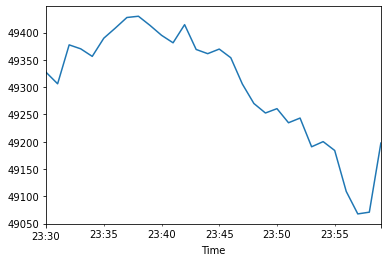

In [25]:
test.Open.plot()

In [26]:
"""  Buy if asset fell by more then 0.2% within the last 30 min (Calculate volatility in a minute for parameter)

     Sell if asset rises by more then 0.15% or falls further by 0.15% 
     (Break even point where you are exceeding the trading fees and actually making a profit)
 """

In [28]:
def strategytest(symbol, qty, entried=False):
    df = getminutedata(symbol, '1m', '30m')
    cumulret = (df.Open.pct_change() +1).cumprod() - 1
    if not entried:
        if cumulret[-1] < -0.002:
            order = client.create_order(symbol=symbol,
                                        side='BUY', type='MARKET',
                                        quantity=qty)
            print(order)
            entried=True
        else:
            print('No Trade has been executed')
    if entried:
        while True:
            df = getminutedata(symbol, '1m', '30m')
            sincebuy = df.loc[df.index > pd.to_datetime(
            order['transactTime'], unit='ms')]
            if len(sincebuy) > 0:
                sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] < -0.015:
                    order = client.create_order(symbol=symbol,
                                        side='SELL', type='MARKET',
                                        quantity=qty)
                    print(order)
                    break

SyntaxError: invalid syntax (<ipython-input-28-92fd80377424>, line 21)

In [ ]:
strategytest('BTCUSDT',0.00)